In [1]:
import pandas as pd
import numpy as np
import sklearn
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [176]:
imdb_df = pd.read_csv('TMDB_tv_dataset_v3.csv') 

In [177]:
imdb_df.head()

,id,name,number_of_seasons,number_of_episodes,original_language,vote_count,vote_average,overview,adult,backdrop_path,...,tagline,genres,created_by,languages,networks,origin_country,spoken_languages,production_companies,production_countries,episode_run_time
0,1399,Game of Thrones,8,73,en,21857,8.442,Seven noble families fight for control of the ...,False,/2OMB0ynKlyIenMJWI2Dy9IWT4c.jpg,...,Winter Is Coming,Sci-Fi & Fantasy_ Drama_ Action & Adventure,David Benioff_ D.B. Weiss,en,HBO,US,English,Revolution Sun Studios_ Television 360_ Genera...,United Kingdom_ United States of America,0
1,71446,Money Heist,3,41,es,17836,8.257,To carry out the biggest heist in history_ a m...,False,/gFZriCkpJYsApPZEF3jhxL4yLzG.jpg,...,The perfect robbery.,Crime_ Drama,Álex Pina,es,Netflix_ Antena 3,ES,Español,Vancouver Media,Spain,70
2,66732,Stranger Things,4,34,en,16161,8.624,When a young boy vanishes_ a small town uncove...,False,/2MaumbgBlW1NoPo3ZJO38A6v7OS.jpg,...,Every ending has a beginning.,Drama_ Sci-Fi & Fantasy_ Mystery,Matt Duffer_ Ross Duffer,en,Netflix,US,English,21 Laps Entertainment_ Monkey Massacre Product...,United States of America,0
3,1402,The Walking Dead,11,177,en,15432,8.121,Sheriff's deputy Rick Grimes awakens from a co...,False,/x4salpjB11umlUOltfNvSSrjSXm.jpg,...,Fight the dead. Fear the living.,Action & Adventure_ Drama_ Sci-Fi & Fantasy,Frank Darabont,en,AMC,US,English,AMC Studios_ Circle of Confusion_ Valhalla Mot...,United States of America,42
4,63174,Lucifer,6,93,en,13870,8.486,Bored and unhappy as the Lord of Hell_ Lucifer...,False,/aDBRtunw49UF4XmqfyNuD9nlYIu.jpg,...,It's good to be bad.,Crime_ Sci-Fi & Fantasy,Tom Kapinos,en,FOX_ Netflix,US,English,Warner Bros. Television_ DC Entertainment_ Jer...,United States of America,45


In [178]:
imdb_df.describe()

,id,number_of_seasons,number_of_episodes,vote_count,vote_average,popularity,episode_run_time
count,158566.000000,158566.000000,158566.000000,158566.000000,158566.000000,158566.000000,158566.000000
mean,103087.369556,1.566761,25.388084,14.144300,2.449529,5.920561,23.646381
std,71300.480941,3.005675,138.793401,196.746395,3.493419,40.589289,47.914734
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42967.250000,1.000000,1.000000,0.000000,0.000000,0.600000,0.000000
50%,91521.500000,1.000000,6.000000,0.000000,0.000000,0.866000,8.000000
75%,146110.750000,1.000000,20.000000,1.000000,6.000000,2.451000,43.000000
max,236368.000000,240.000000,20839.000000,21857.000000,10.000000,3707.008000,6032.000000


In [179]:
imdb_df.set_index('name',inplace=True)

In [180]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158566 entries, Game of Thrones to Anhoniyon Ka Andhera
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    158566 non-null  int64  
 1   number_of_seasons     158566 non-null  int64  
 2   number_of_episodes    158566 non-null  int64  
 3   original_language     158566 non-null  object 
 4   vote_count            158566 non-null  int64  
 5   vote_average          158566 non-null  float64
 6   overview              89357 non-null   object 
 7   adult                 158566 non-null  bool   
 8   backdrop_path         74263 non-null   object 
 9   first_air_date        128542 non-null  object 
 10  last_air_date         130608 non-null  object 
 11  homepage              49380 non-null   object 
 12  in_production         158566 non-null  bool   
 13  original_name         158561 non-null  object 
 14  popularity            158566 

In [11]:
distinct = imdb_db['genres'].value_counts()

In [181]:
attributes = ['id','number_of_seasons','number_of_episodes','vote_count','vote_average','adult','popularity','networks','origin_country']

In [182]:
imdb_df = imdb_df[attributes]

In [183]:
imdb_df.loc['Lucifer']

id                           63174
number_of_seasons                6
number_of_episodes              93
vote_count                   13870
vote_average                 8.486
adult                        False
popularity                 416.668
networks              FOX_ Netflix
origin_country                  US
Name: Lucifer, dtype: object

In [184]:
imdb_df_network_count = imdb_df.groupby(['networks']).count()

In [185]:
imdb_df_network_count.reset_index(inplace=True)
# imdb_df_network_count['id'].rename('count', inplace=True)

In [186]:
imdb_df_network_count = imdb_df_network_count[['id','networks']]

In [187]:
imdb_df = imdb_df.merge(imdb_df_network_count, how='inner', on='networks')

In [188]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93978 entries, 0 to 93977
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id_x                93978 non-null  int64  
 1   number_of_seasons   93978 non-null  int64  
 2   number_of_episodes  93978 non-null  int64  
 3   vote_count          93978 non-null  int64  
 4   vote_average        93978 non-null  float64
 5   adult               93978 non-null  bool   
 6   popularity          93978 non-null  float64
 7   networks            93978 non-null  object 
 8   origin_country      86365 non-null  object 
 9   id_y                93978 non-null  int64  
dtypes: bool(1), float64(2), int64(5), object(2)
memory usage: 6.5+ MB


In [ ]:
imdb_df.drop('id_x',axis=1, inplace=True)

In [197]:
imdb_df.rename(columns = {'id_y': 'network_count'}, inplace = True)

In [202]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93978 entries, 0 to 93977
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   number_of_seasons   93978 non-null  int64  
 1   number_of_episodes  93978 non-null  int64  
 2   vote_count          93978 non-null  int64  
 3   vote_average        93978 non-null  float64
 4   adult               93978 non-null  bool   
 5   popularity          93978 non-null  float64
 6   networks            93978 non-null  object 
 7   origin_country      86365 non-null  object 
 8   network_count       93978 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(2)
memory usage: 5.8+ MB


In [204]:
num_attributes = ['number_of_seasons','number_of_episodes','network_count','popularity','vote_average']

array([[<Axes: xlabel='number_of_seasons', ylabel='number_of_seasons'>,
        <Axes: xlabel='number_of_episodes', ylabel='number_of_seasons'>,
        <Axes: xlabel='network_count', ylabel='number_of_seasons'>,
        <Axes: xlabel='popularity', ylabel='number_of_seasons'>,
        <Axes: xlabel='vote_average', ylabel='number_of_seasons'>],
       [<Axes: xlabel='number_of_seasons', ylabel='number_of_episodes'>,
        <Axes: xlabel='number_of_episodes', ylabel='number_of_episodes'>,
        <Axes: xlabel='network_count', ylabel='number_of_episodes'>,
        <Axes: xlabel='popularity', ylabel='number_of_episodes'>,
        <Axes: xlabel='vote_average', ylabel='number_of_episodes'>],
       [<Axes: xlabel='number_of_seasons', ylabel='network_count'>,
        <Axes: xlabel='number_of_episodes', ylabel='network_count'>,
        <Axes: xlabel='network_count', ylabel='network_count'>,
        <Axes: xlabel='popularity', ylabel='network_count'>,
        <Axes: xlabel='vote_average', yla

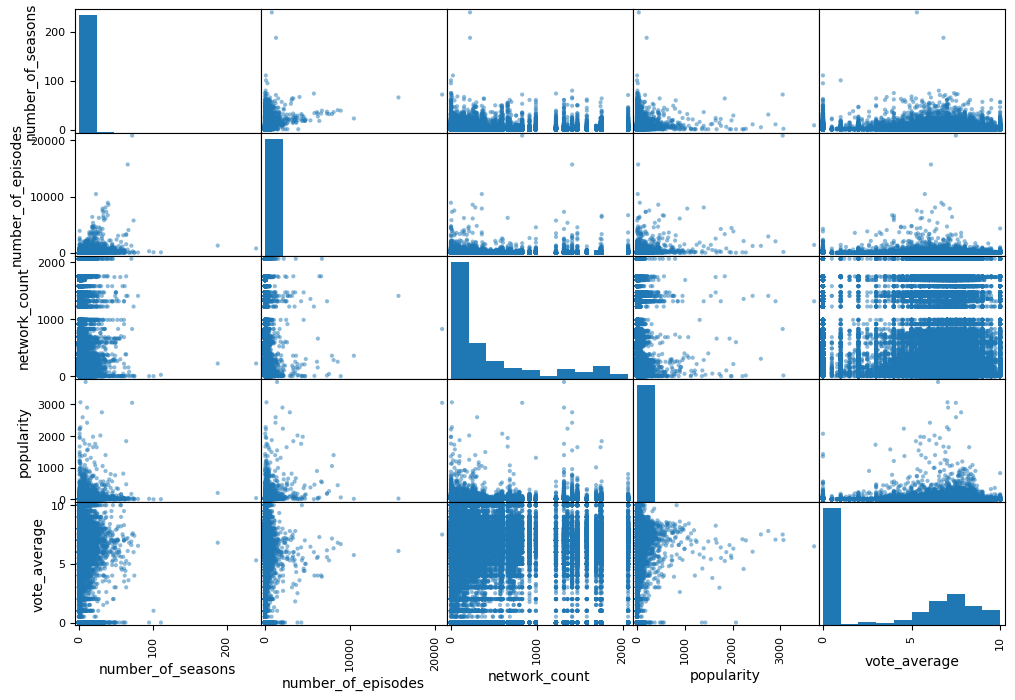

In [205]:
from pandas.plotting import scatter_matrix
scatter_matrix(imdb_df[num_attributes],figsize=(12,8))

In [206]:
imdb_df[num_attributes].corr()

,number_of_seasons,number_of_episodes,network_count,popularity,vote_average
number_of_seasons,1.000000,0.416694,-0.003159,0.202973,0.122480
number_of_episodes,0.416694,1.000000,-0.003150,0.366774,0.068268
network_count,-0.003159,-0.003150,1.000000,0.026961,0.068322
popularity,0.202973,0.366774,0.026961,1.000000,0.119232
vote_average,0.122480,0.068268,0.068322,0.119232,1.000000


In [207]:
imdb_df[num_attributes].corr()

,number_of_seasons,number_of_episodes,network_count,popularity,vote_average
number_of_seasons,1.000000,0.416694,-0.003159,0.202973,0.122480
number_of_episodes,0.416694,1.000000,-0.003150,0.366774,0.068268
network_count,-0.003159,-0.003150,1.000000,0.026961,0.068322
popularity,0.202973,0.366774,0.026961,1.000000,0.119232
vote_average,0.122480,0.068268,0.068322,0.119232,1.000000
